# Using Training and Validation Sets

In this notebook you will use training and validation sets to identify which model best fits the data. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import polyfit
import pathlib as pl
import os
import pandas as pd
np.random.seed(1) # set the random seed for reproducibility 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [13]:
def polynomial(x, coeffs):
    """calculates y values of polynomial at inputs x
    :param x: the input values the polynomial is to be evaluated at
    :param coeffs: the coefficients of the polynomial. The polynomial is of order len(coeffs)-1 """
    poly = np.poly1d(coeffs)
    return poly(x)

In [14]:
path_csv = pl.Path(os.getcwd()) / f'M5_data.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

data = {'X':data_pd['x'].to_numpy(), 'Y':data_pd['y'].to_numpy()}

## Part 1: Model Selection

### Task 1.1: Split the data

The first thing we do is split the data into the relevant sets using the split_data function. To begin with, split the data into 40% training, 30% validation and 30% test. 

In [15]:
def split_data(data_dict, data_split):
    """divide the data into training, validate and test sets. 
    :param data_dict: a dictionary of the data with keys 'X' and 'Y'
    :param data_split: a list of the fraction of the data to be in each set of form 
    [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
    :returns training_dict, validation_dict, test_dict: dictionaries of the same form as the data_dict, 
    containing the different sets"""
    
    assert np.sum(data_split)-1 < 0.01
    
    # work out how many datapoints will be in the train and validation sets 
    n_train = int(len((data_dict['X']))*data_split[0])
    n_validate = int(len((data_dict['X']))*data_split[1])
    
    # generate a random permutation of indices of the data and split into training, validation and test
    perm = np.random.permutation(range(len(data_dict['X'])))
    indices_train, indices_validate, indices_test = np.split(perm, [n_train, n_train+ n_validate])
    
    # create training, validation and test dictionaries 
    training_dict = {'X': data['X'][indices_train], 'Y': data['Y'][indices_train]}
    validation_dict = {'X': data['X'][indices_validate], 'Y': data['Y'][indices_validate]}
    test_dict = {'X': data['X'][indices_test], 'Y': data['Y'][indices_test]}
    
    return training_dict, validation_dict, test_dict

In [16]:
# split the data into training, validation and test sets

training_data, validation_data, test_data = split_data(data, [0.4, 0.3, 0.3])
#################

### Task 1.2: Fit Models

Use the numpy polyfit function to fit polynomials of orders 1 to 6 to the training set. Make a dictionary containing the coefficients of the polynomials with the order of the polynomial as the key. So the coefficients dictionary should look like { 1: array, 2:array} and so on. 

In [17]:
orders = list(range(1, 7))
coefficients = {}

#######################
#make dictionary containing coefficients of polynomials fitted to the training data as described above. 

for order in orders:
    coefficients[order] = polyfit(training_data['X'], training_data['Y'], order)
######################

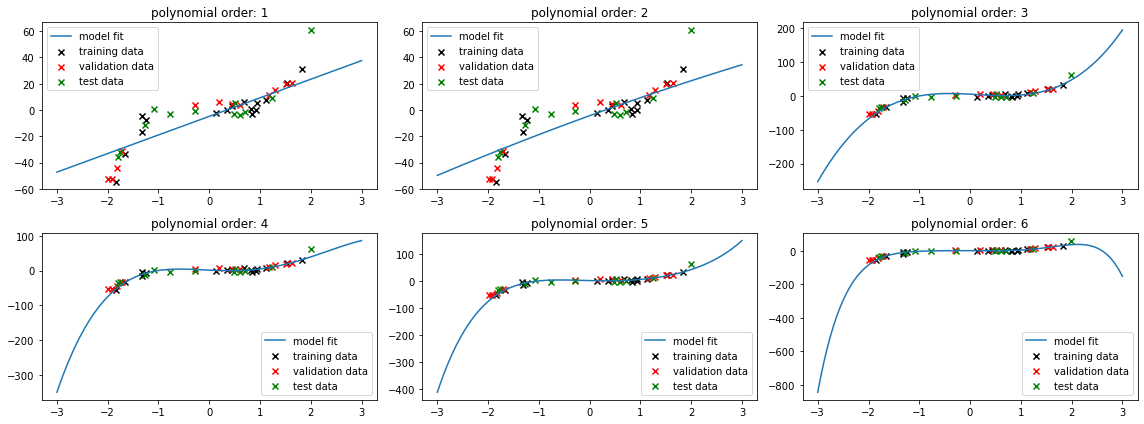

In [18]:
#### Plot each of the fitted models along with the training and validation data 

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
ax = axs.flatten()

x_plot = np.linspace(-3, 3, 100)

for i, coeffs in enumerate(coefficients.values()):
    ax[i].plot(x_plot, polynomial(x_plot, coeffs), label='model fit')
    ax[i].scatter(training_data['X'], training_data['Y'], marker='x', color='k', label='training data')
    ax[i].scatter(validation_data['X'], validation_data['Y'], marker='x', color='r', label='validation data')
    ax[i].scatter(test_data['X'], test_data['Y'], marker='x', color='g', label='test data')
    ax[i].set_title(f'polynomial order: {list(coefficients.keys())[i]}')
    ax[i].legend()
plt.tight_layout()
plt.legend()



### Task 1.3: Calculate the RMSE for Training and Validation Sets


Calculate the root mean squared error for both the training and validation sets. Plot this on a graph, and use this to decide which model is the best fit. Fill out the first question in the corrosponding questionaire. 

In [19]:
training_RMSEs = []
validation_RMSEs = []

#######################
for key, coeffs in coefficients.items():
    
    training_model_value = polynomial(training_data['X'], coeffs)
    training_RMSEs.append(np.sqrt(np.mean(np.square(training_model_value - training_data['Y']))))
    validation_model_value = polynomial(validation_data['X'], coeffs)
    validation_RMSEs.append(np.sqrt(np.mean(np.square(validation_model_value - validation_data['Y']))))
    
#######################

best = np.argmin(validation_RMSEs)
print('best model:', orders[best])

best model: 3


Text(0.5, 0, 'polynomial order')

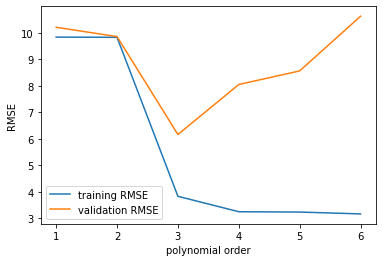

In [20]:
# Plot the training and validation RMSEs of the models
fig = plt.figure()
plt.plot(orders, training_RMSEs, label='training RMSE')
plt.plot(orders, validation_RMSEs, label='validation RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('polynomial order')
# plt.ylim(0, 10)

## Part 2: Model Performance

### Task 2.1 Use the test set to evaluate model performance 

Calculate the RMSE of the model predictions compared to the test data 

In [21]:
### use the test dataset to calculate the RMSE of the best model on the test data

best = np.argmin(validation_RMSEs)

test_model_value = polynomial(test_data['X'], coefficients[3])
test_RMSE = np.sqrt(np.mean(np.square(test_model_value - test_data['Y'])))
print('RMSE on the test set:', test_RMSE)

####################


RMSE on the test set: 7.160440202186666
